Un ensemble es una combinación de múltiples modelos (denominados estimadores base) para mejorar la capacidad de generalización y robustez sobre un solo modelo

# Entrenamiento Proceso normal


In [1]:
# Importar librerías para manejo de datos y modelos
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# Cargar el conjunto de datos Digits
digits = load_digits()
X = digits.data
y = digits.target


In [3]:
# Mostrar la forma de los datos
print("Forma de los datos:", X.shape)
# Mostrar las primeras 5 etiquetas
print("Primeras 5 etiquetas:", y[:5])


Forma de los datos: (1797, 64)
Primeras 5 etiquetas: [0 1 2 3 4]


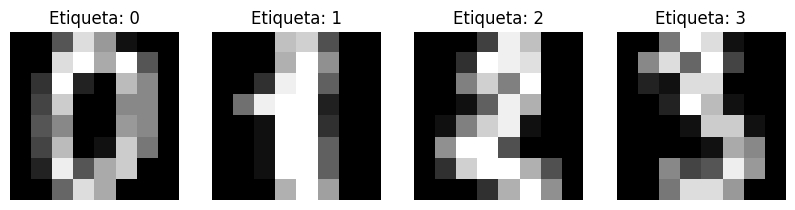

In [4]:
import matplotlib.pyplot as plt

# Mostrar algunas imágenes
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, y):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Etiqueta: {label}')
    ax.axis('off')
plt.show()


In [5]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el modelo
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [7]:
# Realizar predicciones
y_pred_tree = tree.predict(X_test)
# Calcular precisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Precisión del Árbol de Decisión: {accuracy_tree:.4f}")


Precisión del Árbol de Decisión: 0.8426


# Bagging

Bagging implica entrenar múltiples modelos en diferentes subconjuntos de datos obtenidos mediante muestreo con reemplazo (bootstrap)


Ventajas:
Reduce la varianza y ayuda a evitar el overfitting.
Los modelos pueden ser entrenados en paralelo, aprovechando múltiples núcleos de procesamiento.

Limitaciones:
Menos efectivo si el modelo base ya es estable (es decir, tiene baja varianza).
No reduce el sesgo del modelo base.

In [8]:
from sklearn.ensemble import BaggingClassifier


In [9]:
# Crear y entrenar el modelo Bagging
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [10]:
# Realizar predicciones
y_pred_bagging = bagging.predict(X_test)
# Calcular precisión
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Precisión del Bagging: {accuracy_bagging:.4f}")


Precisión del Bagging: 0.9574


# AdaBoost

Técnica de Boosting que combina múltiples modelos débiles para formar un modelo fuerte, enfocándose en corregir los errores de los modelos anteriores.

Cómo Funciona:
Los modelos se entrenan secuencialmente.
En cada iteración, se ajustan los pesos de las muestras:
Se incrementan los pesos de las muestras mal clasificadas, para que el siguiente modelo preste más atención a ellas.
Se disminuyen los pesos de las muestras correctamente clasificadas.
Cada modelo aporta una predicción ponderada en función de su precisión.

Ventajas:
Puede convertir modelos débiles en un modelo fuerte.
Es efectivo para mejorar el rendimiento en problemas donde los modelos simples no son suficientes.

Limitaciones:
Sensible al ruido y a los outliers, ya que intenta ajustar las muestras difíciles.
Requiere modelos base que sean algo mejores que el azar.

In [11]:
from sklearn.ensemble import AdaBoostClassifier


In [12]:
# Crear y entrenar el modelo AdaBoost
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1,
    random_state=42
)
ada.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, random_state=42)

In [13]:
# Realizar predicciones
y_pred_ada = ada.predict(X_test)
# Calcular precisión
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"Precisión de AdaBoost: {accuracy_ada:.4f}")


Precisión de AdaBoost: 0.7815


In [14]:
# Ajustar hiperparámetros
ada_adjusted = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)
ada_adjusted.fit(X_train, y_train)
y_pred_ada_adjusted = ada_adjusted.predict(X_test)
accuracy_ada_adjusted = accuracy_score(y_test, y_pred_ada_adjusted)
print(f"Precisión de AdaBoost Ajustado: {accuracy_ada_adjusted:.4f}")


Precisión de AdaBoost Ajustado: 0.9537


# Stacking

Técnica de ensemble que combina diferentes tipos de modelos (denominados estimadores base) y utiliza un modelo meta (meta-estimador) para hacer predicciones finales, aprendiendo a partir de las predicciones de los modelos base.

Cómo Funciona:

Fase 1: Entrenamiento de los modelos base en el conjunto de entrenamiento.

Fase 2: Los modelos base hacen predicciones sobre un conjunto de validación o mediante validación cruzada.

Fase 3: Se utilizan las predicciones de los modelos base como características de entrada para entrenar el modelo meta.

El modelo meta aprende a combinar las predicciones de los modelos base para mejorar la precisión global.

Ventajas:
Aprovecha las fortalezas de diferentes algoritmos y compensa sus debilidades.
Puede mejorar el rendimiento en comparación con los modelos individuales y otros métodos de ensemble.

Limitaciones:
Más complejo y computacionalmente intensivo.
Riesgo de overfitting si no se implementa correctamente, especialmente si se utiliza el mismo conjunto de datos para entrenar modelos base y el meta-estimador.
Requiere cuidado en la preparación de datos y la selección de modelos.

In [15]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [16]:
# Definir estimadores base
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]


In [17]:
# Crear y entrenar el modelo Stacking
stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    passthrough=False
)
stacking.fit(X_train, y_train)


StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('svc', SVC(probability=True))],
                   final_estimator=LogisticRegression())

In [18]:
# Realizar predicciones
y_pred_stacking = stacking.predict(X_test)
# Calcular precisión
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Precisión del Stacking: {accuracy_stacking:.4f}")


Precisión del Stacking: 0.9889


# Análisis general

In [19]:
import pandas as pd

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'Bagging', 'AdaBoost Ajustado', 'Stacking'],
    'Precisión': [
        accuracy_tree,
        accuracy_bagging,
        accuracy_ada_adjusted,
        accuracy_stacking
    ]
})
print("\nResumen de Resultados:")
print(resultados)



Resumen de Resultados:
              Modelo  Precisión
0  Árbol de Decisión   0.842593
1            Bagging   0.957407
2  AdaBoost Ajustado   0.953704
3           Stacking   0.988889


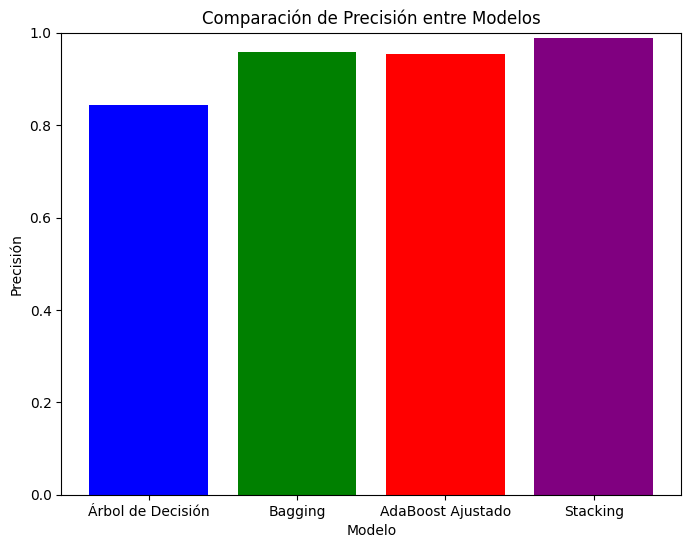

In [20]:
import matplotlib.pyplot as plt

# Crear una gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(resultados['Modelo'], resultados['Precisión'], color=['blue', 'green', 'red', 'purple'])
plt.title('Comparación de Precisión entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.show()
